In [1]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# training
from sklearn.model_selection import train_test_split, cross_val_predict, RandomizedSearchCV, StratifiedKFold

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer

%matplotlib inline

## Lendo o dataset

In [2]:
column_names = []
with open('data/spambase.names', 'r') as f:
    for line in f:

        if line.strip().endswith('continuous.'):
            column_names.append(line[:line.index(':')])

    f.close()

column_names.append('spam')

In [3]:
df = pd.read_csv('data/spambase.data', names=column_names)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
word_freq_make,0.000,0.210,0.060,0.000,0.000,0.000,0.000,0.000,0.150,0.060
word_freq_address,0.640,0.280,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120
word_freq_all,0.640,0.500,0.710,0.000,0.000,0.000,0.000,0.000,0.460,0.770
word_freq_3d,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
word_freq_our,0.320,0.140,1.230,0.630,0.630,1.850,1.920,1.880,0.610,0.190
word_freq_over,0.000,0.280,0.190,0.000,0.000,0.000,0.000,0.000,0.000,0.320
word_freq_remove,0.000,0.210,0.190,0.310,0.310,0.000,0.000,0.000,0.300,0.380
word_freq_internet,0.000,0.070,0.120,0.630,0.630,1.850,0.000,1.880,0.000,0.000
word_freq_order,0.000,0.000,0.640,0.310,0.310,0.000,0.000,0.000,0.920,0.060
word_freq_mail,0.000,0.940,0.250,0.630,0.630,0.000,0.640,0.000,0.760,0.000


In [4]:
# sem dados ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [5]:
# separando em conjunto de treino e de teste
X = df.drop(columns=['spam'])
y = df['spam']

# divide o dataset em treino e teste, com stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3220, 57), (1381, 57), (3220,), (1381,))

In [6]:
# usando StratifiedKFold para garantir que seja feita uma amostragem estratificada durante o hypertuning
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
# usando f1 como métrica para o randomized search cross validation
score = make_scorer(f1_score)

In [8]:
# dataset com scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Treinamento dos modelos
Testaremos treinar com e sem usar scaling, para comparar os resultados

### Árvore de decisão


#### Sem Scaling

In [ ]:
# Utilizando os hiperparâmetros padrões do scikit-learn
dt_clf = DecisionTreeClassifier(random_state=42)
preds = cross_val_predict(dt_clf, X_train, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.8701700154559505
Recall: 0.8873128447596532
F1-score: 0.8786578228638314


Tuning de hiperparâmetros

In [ ]:
dt_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, "sqrt", "log2"]
}

rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_dt.fit(X_train, y_train)
print(f"Melhores hiperparametros: {rs_dt.best_params_}")
print(f"Melhor F1 score: {rs_dt.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparametros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
Melhor F1 score: 0.8897705246431116


#### Com scaling

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)
preds = cross_val_predict(dt_clf, X_train_scaled, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.8688271604938271
Recall: 0.8873128447596532
F1-score: 0.877972709551657


In [ ]:
dt_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, "sqrt", "log2"]
}

rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_dt.fit(X_train_scaled, y_train)
print(f"Melhores hiperparametros: {rs_dt.best_params_}")
print(f"Melhor F1 score: {rs_dt.best_score_}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Melhores hiperparametros: {'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8}
Melhor F1 score: 0.8894693778747339


No final das contas temos que o dataset sem scaling ficou com o f1 score levemente melhor que o dataset com scaling (88.97% contra 88.94%, no conjunto de validação do cross validation). A melhor combinação de hiperparâmetros ficou como {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}.

### Bayesiano ingênuo

#### Sem scaling

##### Gaussiano

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = GaussianNB()
preds = cross_val_predict(nb_clf, X_train, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.6954022988505747
Recall: 0.9535066981875493
F1-score: 0.8042539049518113


In [ ]:
nb_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
}

rs_nb = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhores hiperparametros: {'var_smoothing': 1e-06}
Melhor F1 score: 0.8263500183169544


##### Multinomial

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = MultinomialNB()
preds = cross_val_predict(nb_clf, X_train, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.7377049180327869
Recall: 0.7092198581560284
F1-score: 0.7231820008035356


In [ ]:
nb_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'fit_prior': [True, False]
}

rs_nb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores hiperparametros: {'fit_prior': False, 'alpha': 1e-08}
Melhor F1 score: 0.7268401359077149


##### Bernoulli

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = BernoulliNB()
preds = cross_val_predict(nb_clf, X_train, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.8851063829787233
Recall: 0.8195429472025216
F1-score: 0.851063829787234


In [ ]:
nb_grid = {
    'binarize': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'fit_prior': [True, False]
}

rs_nb = RandomizedSearchCV(
    estimator=BernoulliNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores hiperparametros: {'fit_prior': False, 'binarize': 0.1, 'alpha': 0.1}
Melhor F1 score: 0.8730489796102455


#### Com scaling

##### Gaussiano

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = GaussianNB()
preds = cross_val_predict(nb_clf, X_train_scaled, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.6856659142212189
Recall: 0.9574468085106383
F1-score: 0.7990792502466294


In [ ]:
nb_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
}

rs_nb = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train_scaled, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhores hiperparametros: {'var_smoothing': 1e-05}
Melhor F1 score: 0.8038195005253103


##### Multinomial

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = MultinomialNB()
preds = cross_val_predict(nb_clf, X_train_scaled, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.9276315789473685
Recall: 0.7777777777777778
F1-score: 0.8461208744106301


In [ ]:
nb_grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'fit_prior': [True, False]
}

rs_nb = RandomizedSearchCV(
    estimator=MultinomialNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train_scaled, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores hiperparametros: {'fit_prior': True, 'alpha': 1e-05}
Melhor F1 score: 0.8528650943530615


##### Bernoulli

In [ ]:
# Utilizando os hiperparâmetros padrões
nb_clf = BernoulliNB()
preds = cross_val_predict(nb_clf, X_train_scaled, y_train, cv=5)

print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.877104377104377
Recall: 0.8211189913317573
F1-score: 0.8481888481888482


In [ ]:
nb_grid = {
    'binarize': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'alpha': [1e-3, 1e-2, 1e-1, 1e0, 1e1,],
    'fit_prior': [True, False]
}

rs_nb = RandomizedSearchCV(
    estimator=BernoulliNB(),
    param_distributions=nb_grid,
    random_state=42,
    n_iter=100,
    scoring=score,
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

rs_nb.fit(X_train_scaled, y_train)

print(f"Melhores hiperparametros: {rs_nb.best_params_}")
print(f"Melhor F1 score: {rs_nb.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores hiperparametros: {'fit_prior': False, 'binarize': 0.01, 'alpha': 1.0}
Melhor F1 score: 0.8696767144558869


O melhor resultado obtido se deu no Naive Bayes Bernoulli sem escaling com um F1 Score de 0.8730489796102455. Os melhores hiperparametros foram {'fit_prior': False, 'binarize': 0.1, 'alpha': 0.1}

### Regressão Logística

#### Definindo o modelo de regressão logística

In [ ]:
# Criando o modelo de regressão logística
log_reg = LogisticRegression(random_state=42, max_iter=2000)

#### Sem Scaling

In [ ]:
# Treinamento sem scaling, utilizando validação cruzada
preds = cross_val_predict(log_reg, X_train, y_train, cv=5)

# Avaliando as métricas de desempenho
print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision: 0.9131832797427653
Recall: 0.8951930654058313
F1-score: 0.9040986868284918


Tuning de hiperparâmetros

In [ ]:
# Definição da grade de hiperparâmetros corrigida
param_grid = {
    'solver': ['liblinear', 'saga'],  # 'liblinear' suporta apenas 'l1' e 'l2'; 'saga' suporta 'elasticnet' também
    'penalty': ['l1', 'l2'],  # Removendo 'none' pois causa erro
    'C': np.logspace(-2, 1, 5)  # [0.01, 0.1, 1, 10, 100] Valores de regularização
}

# Criando o modelo base
log_reg = LogisticRegression(max_iter=7000)  # Aumentando max_iter para evitar erro de convergência

# RandomizedSearchCV corrigido
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=6,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Ajustando o modelo
random_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor F1 score:", random_search.best_score_)

Melhores hiperparâmetros: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.31622776601683794}
Melhor F1 score: 0.9000972808921993


#### Com scaling

In [ ]:
# Usando o MinMaxScaler para escalonar os dados
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo com validação cruzada nos dados escalonados
preds_scaled = cross_val_predict(log_reg, X_train_scaled, y_train, cv=5)

# Avaliando as métricas de desempenho nos dados escalonados
print(f"Precision (com scaling): {precision_score(y_train, preds_scaled)}")
print(f"Recall (com scaling): {recall_score(y_train, preds_scaled)}")
print(f"F1-score (com scaling): {f1_score(y_train, preds_scaled)}")


Precision (com scaling): 0.9000900090009001
Recall (com scaling): 0.7880220646178093
F1-score (com scaling): 0.8403361344537815


Tuning de Hiperparâmetros (com scaling)

In [ ]:
# Usando os mesmos hiperparâmetros, mas agora para os dados escalonados
rs_log_reg_scaled = RandomizedSearchCV(
    log_reg,
    param_grid,
    random_state=42,
    n_iter=20,
    scoring='f1',
    cv=stratified_cv,
    n_jobs=-1,
    verbose=2
)

# Treinando o modelo com os melhores hiperparâmetros para dados escalonados
rs_log_reg_scaled.fit(X_train_scaled, y_train)

# Exibindo os melhores hiperparâmetros
print(f"Melhores hiperparâmetros (com scaling): {rs_log_reg_scaled.best_params_}")
print(f"Melhor F1 score (com scaling): {rs_log_reg_scaled.best_score_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores hiperparâmetros (com scaling): {'solver': 'saga', 'penalty': 'l1', 'C': 10.0}
Melhor F1 score (com scaling): 0.9037401630812191


O melhor resultado com regressão logísitca foi realizando o scaling no dataset, e com os hiperparâmetros {'solver': 'saga', 'penalty': 'l1', 'C': 10.0}, obtendo 0.9037 de f1 score.

### K-Vizinhos

#### Definindo o modelo de K-Vizinhos

In [10]:
knn_clf = KNeighborsClassifier()

#### Sem Scaling

In [11]:
# Treinamento sem scaling, utilizando validação cruzada
preds = cross_val_predict(knn_clf, X_train, y_train, cv=5)

# Avaliando as métricas de desempenho
print(f"Precision: {precision_score(y_train, preds)}")
print(f"Recall: {recall_score(y_train, preds)}")
print(f"F1-score: {f1_score(y_train, preds)}")

Precision: 0.7332796132151491
Recall: 0.7171000788022065
F1-score: 0.7250996015936255


#### Tuning de Hiperparâmetros

In [12]:
# Definição da grade de hiperparâmetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Pesos dos vizinhos
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Métrica de distância
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn_clf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Ajustando o modelo
random_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor F1 score:", random_search.best_score_)

Melhores hiperparâmetros: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Melhor F1 score: 0.8099647934411882


#### Com Scaling

In [13]:
# Treinamento com scaling, utilizando validação cruzada
preds_scaled = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=5)

# Avaliando as métricas de desempenho
print(f"Precision (com scaling): {precision_score(y_train, preds_scaled)}")
print(f"Recall (com scaling): {recall_score(y_train, preds_scaled)}")
print(f"F1-score (com scaling): {f1_score(y_train, preds_scaled)}")

Precision (com scaling): 0.8740801308258381
Recall (com scaling): 0.8423955870764381
F1-score (com scaling): 0.8579454253611557


#### Tuning de Hiperparâmetros (com scaling)

In [14]:
# Ajustando o modelo
random_search.fit(X_train_scaled, y_train)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros (com scaling):", random_search.best_params_)
print("Melhor F1 score (com scaling):", random_search.best_score_)

Melhores hiperparâmetros (com scaling): {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
Melhor F1 score (com scaling): 0.8766526915769756


Observou-se uma melhoria significativa no KNN utilizando scaling. O melhor resultado foi com o conjunto de hiperparâmetros {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}, obtendo 0.8766 de f1 score.

## Curvas de aprendizagem

In [22]:
# decision tree vai sem scaling
best_dt = DecisionTreeClassifier(
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features=None, 
    max_depth=10, 
    random_state=42
)

# naive bayes vai sem scaling
best_nb = BernoulliNB(
    fit_prior=False,
    binarize=0.1,
    alpha=0.1
)

# regressao logistica vai com scaling
best_lr = LogisticRegression(
    solver='saga',
    penalty='l1',
    C=10.0,
    max_iter=7000
)

# knn usa scaling
best_knn = KNeighborsClassifier(
    weights='distance',
    n_neighbors=5,
    metric='manhattan'
)

dt_precision = []
dt_recall = []
dt_f1 = []

nb_precision = []
nb_recall = []
nb_f1 = []

lr_precision = []
lr_recall = []
lr_f1 = []

knn_precision = []
knn_recall = []
knn_f1 = []

In [20]:
def train_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds

def evaluate_model(preds, y_test):
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    return [precision, recall, f1]

In [23]:
test_size = 0.95
while test_size >= 0.05:
    print(f"Running with test_size={test_size}/0.05")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    dt_preds = train_model(best_dt, X_train, y_train, X_test)
    dt_metrics = evaluate_model(dt_preds, y_test)
    dt_precision.append(dt_metrics[0])
    dt_recall.append(dt_metrics[1])
    dt_f1.append(dt_metrics[2])

    nb_preds = train_model(best_nb, X_train, y_train, X_test)
    nb_metrics = evaluate_model(nb_preds, y_test)
    nb_precision.append(nb_metrics[0])
    nb_recall.append(nb_metrics[1])
    nb_f1.append(nb_metrics[2])

    lr_preds = train_model(best_lr, X_train_scaled, y_train, X_test_scaled)
    lr_metrics = evaluate_model(lr_preds, y_test)
    lr_precision.append(lr_metrics[0])
    lr_recall.append(lr_metrics[1])
    lr_f1.append(lr_metrics[2])

    knn_preds = train_model(best_knn, X_train_scaled, y_train, X_test_scaled)
    knn_metrics = evaluate_model(knn_preds, y_test)
    knn_precision.append(knn_metrics[0])
    knn_recall.append(knn_metrics[1])
    knn_f1.append(knn_metrics[2])

    test_size = round(test_size - 0.05, 2)


Running with test_size=0.95/0.05
Running with test_size=0.9/0.05
Running with test_size=0.85/0.05
Running with test_size=0.8/0.05
Running with test_size=0.75/0.05
Running with test_size=0.7/0.05
Running with test_size=0.65/0.05
Running with test_size=0.6/0.05
Running with test_size=0.55/0.05
Running with test_size=0.5/0.05
Running with test_size=0.45/0.05
Running with test_size=0.4/0.05
Running with test_size=0.35/0.05
Running with test_size=0.3/0.05
Running with test_size=0.25/0.05
Running with test_size=0.2/0.05
Running with test_size=0.15/0.05
Running with test_size=0.1/0.05
Running with test_size=0.05/0.05


In [38]:
train_size = np.arange(0.05, 1.0, 0.05)

In [40]:
np_dt_precision = np.array(dt_precision)
np_lr_precision = np.array(lr_precision)
np_knn_precision = np.array(knn_precision)
np_nb_precision = np.array(nb_precision)

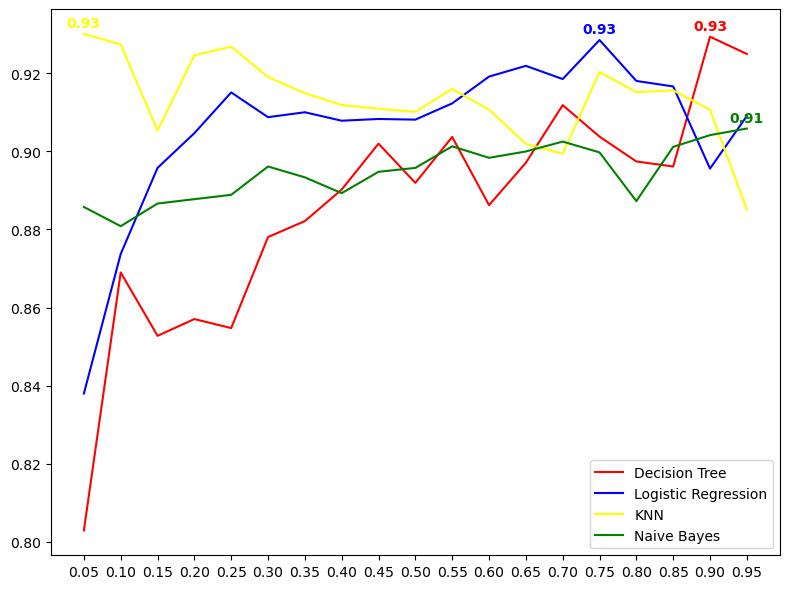

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_size, dt_precision, color='red', label='Decision Tree')
ax.plot(train_size, lr_precision, color='blue', label='Logistic Regression')
ax.plot(train_size, knn_precision, color='yellow', label='KNN')
ax.plot(train_size, nb_precision, color='green', label='Naive Bayes')

def annotate_max(x, y, color):
    max_index = y.argmax()
    max_x = x[max_index]
    max_y = y[max_index]
    ax.annotate(f'{max_y:.2f}', (max_x, max_y), textcoords="offset points",
                xytext=(0,5), ha='center', color=color, fontsize=10, fontweight='bold')

annotate_max(train_size, np_dt_precision, 'red')
annotate_max(train_size, np_lr_precision, 'blue')
annotate_max(train_size, np_knn_precision, 'yellow')
annotate_max(train_size, np_nb_precision, 'green')

ax.legend()
ax.set(xticks=train_size)
plt.tight_layout()
plt.show()

In [43]:
np_dt_recall = np.array(dt_recall)
np_lr_recall = np.array(lr_recall)
np_knn_recall = np.array(knn_recall)
np_nb_recall = np.array(nb_recall)

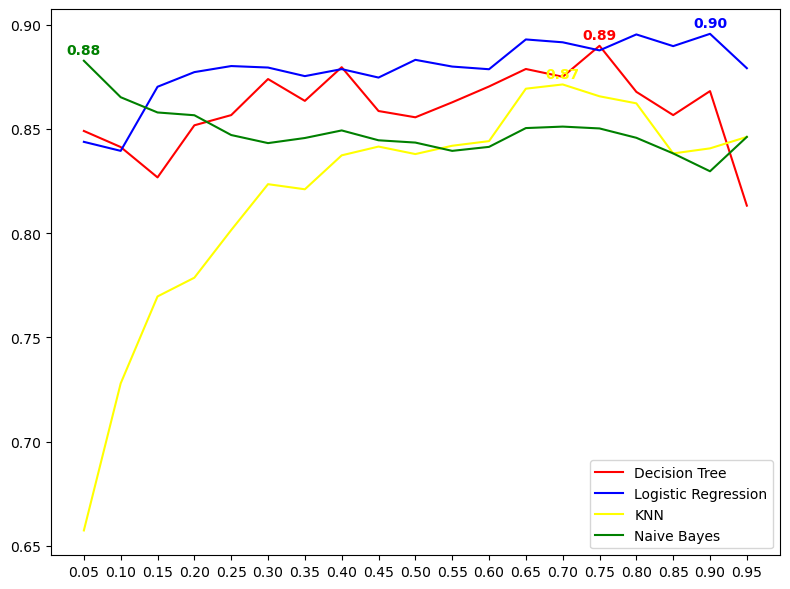

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_size, dt_recall, color='red', label='Decision Tree')
ax.plot(train_size, lr_recall, color='blue', label='Logistic Regression')
ax.plot(train_size, knn_recall, color='yellow', label='KNN')
ax.plot(train_size, nb_recall, color='green', label='Naive Bayes')

def annotate_max(x, y, color):
    max_index = y.argmax()
    max_x = x[max_index]
    max_y = y[max_index]
    ax.annotate(f'{max_y:.2f}', (max_x, max_y), textcoords="offset points",
                xytext=(0,5), ha='center', color=color, fontsize=10, fontweight='bold')

annotate_max(train_size, np_dt_recall, 'red')
annotate_max(train_size, np_lr_recall, 'blue')
annotate_max(train_size, np_knn_recall, 'yellow')
annotate_max(train_size, np_nb_recall, 'green')

ax.legend()
ax.set(xticks=train_size)
plt.tight_layout()
plt.show()

In [45]:
np_dt_f1 = np.array(dt_f1)
np_lr_f1 = np.array(lr_f1)
np_knn_f1 = np.array(knn_f1)
np_nb_f1 = np.array(nb_f1)

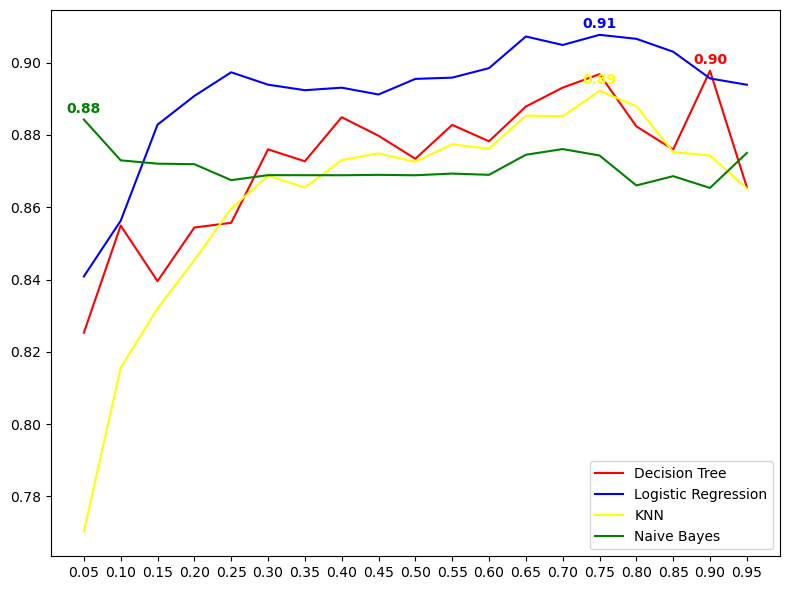

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_size, dt_f1, color='red', label='Decision Tree')
ax.plot(train_size, lr_f1, color='blue', label='Logistic Regression')
ax.plot(train_size, knn_f1, color='yellow', label='KNN')
ax.plot(train_size, nb_f1, color='green', label='Naive Bayes')

def annotate_max(x, y, color):
    max_index = y.argmax()
    max_x = x[max_index]
    max_y = y[max_index]
    ax.annotate(f'{max_y:.2f}', (max_x, max_y), textcoords="offset points",
                xytext=(0,5), ha='center', color=color, fontsize=10, fontweight='bold')

annotate_max(train_size, np_dt_f1, 'red')
annotate_max(train_size, np_lr_f1, 'blue')
annotate_max(train_size, np_knn_f1, 'yellow')
annotate_max(train_size, np_nb_f1, 'green')

ax.legend()
ax.set(xticks=train_size)
plt.tight_layout()
plt.show()